### creating the workspace and data
We being by creating a workspace for `deepql`, where we save models, data, etc...

In [1]:
import deepql
import matplotlib.pyplot as plt

# how to use the library
#deepql.help()

In [2]:
# this creates the folder structure used
# deepql.create_workspace()

### data for `force_type="position"`

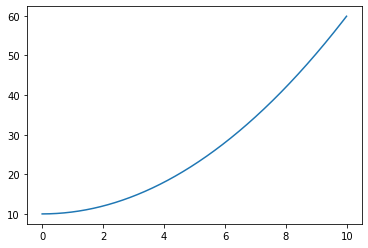

In [6]:
# define the functions for the differential equation to be solved numerically
N_steps = 1000
xi = 10
vi = 0
dt = 1e-2
relative_tolerance = 1e-1

def force_harmonic_oscillator(x):
    return 1

_, sol_status, data = deepql.integrate_diffeq(N=N_steps, xi=xi, vi=vi, 
    dt=dt, 
    force_function=force_harmonic_oscillator, force_type="position",
    xtol=relative_tolerance)


plt.plot(data[:,0],data[:,1])
plt.show()

In [7]:
# saves the data
deepql.compile_data_to_csv(data, "harmonic_0506")

In [4]:
# now is timee to separate the data
# so its useful for our NN model
import pandas as pd
import deepql

df = pd.read_csv("./gen_data/harmonic_0506.csv")

deepql.separate_data(df, run_length=50, xmax=None, vmax=None)


,x_initial,v_initial,x_step10,v_step10,x_step20,v_step20,x_step30,v_step30,x_step40,v_step40,x_step50,v_step50
0,10.000,0.0,10.005,0.1,10.020,0.2,10.045,0.3,10.080,0.4,10.125,0.5
1,10.005,0.1,10.020,0.2,10.045,0.3,10.080,0.4,10.125,0.5,10.180,0.6
2,10.020,0.2,10.045,0.3,10.080,0.4,10.125,0.5,10.180,0.6,10.245,0.7
3,10.045,0.3,10.080,0.4,10.125,0.5,10.180,0.6,10.245,0.7,10.320,0.8
4,10.080,0.4,10.125,0.5,10.180,0.6,10.245,0.7,10.320,0.8,10.405,0.9
...,...,...,...,...,...,...,...,...,...,...,...,...
90,50.500,9.0,51.405,9.1,52.320,9.2,53.245,9.3,54.180,9.4,55.125,9.5
91,51.405,9.1,52.320,9.2,53.245,9.3,54.180,9.4,55.125,9.5,56.080,9.6
92,52.320,9.2,53.245,9.3,54.180,9.4,55.125,9.5,56.080,9.6,57.045,9.7
93,53.245,9.3,54.180,9.4,55.125,9.5,56.080,9.6,57.045,9.7,58.020,9.8


In [3]:
run_length = 50

In [7]:
x_initial = []
v_initial = []
x_steps = [[] for _ in range(run_length//10)]
v_steps = [[] for _ in range(run_length//10)]

In [20]:
for index in range(run_length, len(df) - 1, 10):
    x_initial.append(df.position[index - run_length])
    v_initial.append(df.velocity[index - run_length])
    for step in range(run_length//10):
        x_steps[step].append(df.position[index - run_length + step*10])
        v_steps[step].append(df.velocity[index - run_length + step*10])

In [14]:
for index in range(run_length, len(df) - 1, 10):
    x_initial.append(df.position[index - run_length])
    v_initial.append(df.velocity[index - run_length])
    for step in range(run_length//10):
        x_steps[step].append(df.position[index - run_length + step])
        v_steps[step].append(df.velocity[index - run_length + step])

In [19]:
for step in range(run_length//10):
    step_num = (step+1)*10
    print(f'vstep{step_num:02d}')
    print(v_steps[step])


vstep10
[0.01, 0.1099999999999999, 0.2099999999999999, 0.31, 0.41, 0.5100000000000001, 0.6100000000000003, 0.7100000000000003, 0.8100000000000005, 0.9100000000000008, 1.010000000000001, 1.11, 1.2099999999999995, 1.3099999999999998, 1.4099999999999997, 1.5099999999999998, 1.61, 1.7099999999999995, 1.81, 1.91, 2.01, 2.11, 2.21, 2.31, 2.41, 2.51, 2.6100000000000003, 2.71, 2.81, 2.91, 3.01, 3.11, 3.21, 3.31, 3.4100000000000006, 3.5100000000000007, 3.61, 3.71, 3.81, 3.9100000000000006, 4.01, 4.110000000000001, 4.210000000000001, 4.310000000000001, 4.410000000000001, 4.510000000000001, 4.610000000000001, 4.710000000000001, 4.810000000000002, 4.910000000000002, 5.010000000000002, 5.110000000000002, 5.210000000000002, 5.310000000000002, 5.410000000000002, 5.510000000000002, 5.610000000000003, 5.710000000000004, 5.810000000000003, 5.910000000000004, 6.0100000000000025, 6.110000000000003, 6.210000000000003, 6.310000000000003, 6.410000000000004, 6.5100000000000025, 6.610000000000003, 6.7100000000

In [15]:
x_steps[1]

[10.0002,
 10.0072,
 10.0242,
 10.0512,
 10.0882,
 10.1352,
 10.1922,
 10.2592,
 10.336200000000002,
 10.4232,
 10.5202,
 10.6272,
 10.7442,
 10.8712,
 11.0082,
 11.1552,
 11.3122,
 11.4792,
 11.6562,
 11.8432,
 12.0402,
 12.2472,
 12.464200000000002,
 12.6912,
 12.9282,
 13.1752,
 13.432200000000002,
 13.6992,
 13.976200000000002,
 14.2632,
 14.560200000000002,
 14.867200000000004,
 15.1842,
 15.511200000000004,
 15.848200000000004,
 16.195200000000003,
 16.552200000000006,
 16.919200000000004,
 17.296200000000006,
 17.683200000000006,
 18.08020000000001,
 18.48720000000001,
 18.904200000000007,
 19.33120000000001,
 19.768200000000007,
 20.215200000000014,
 20.67220000000001,
 21.13920000000001,
 21.616200000000013,
 22.10320000000001,
 22.60020000000002,
 23.10720000000002,
 23.624200000000016,
 24.151200000000017,
 24.688200000000016,
 25.235200000000024,
 25.792200000000022,
 26.35920000000002,
 26.936200000000028,
 27.523200000000024,
 28.120200000000036,
 28.727200000000025,
 29.

In [6]:
[[] for _ in range(run_length//10)]

[[], [], [], [], []]

## Training the model

In [ ]:
from dataset import MyDataset, DataLoader
import torch
import torch.nn as nn

import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
deepql.diffnet

In [ ]:
my_dataset = MyDataset(pd.read_csv("./data/song_combined_df.csv", index_col=0), step_size=50)
my_dataloader = DataLoader(my_dataset, batch_size=32, shuffle=True)

# Loading the model
model = torch.load("./model/040223.pt")

plt.plot(list(model.parameters())[0].detach())
plt.title("Loaded parameters of activation function")
plt.show()

# Hyperparameters
smooth_rate = 0.03
constrain_rate = 1.0 # F(v=0) = 0
targets_rate = 1.05

# Define number of epochs
num_epochs = 50

# Define loss function and optimizer
L2_loss = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.4)

running_loss = 0
loss_array = []

#used for graphs
max_i = len(my_dataloader)

# Iterate through epochs
for epoch in range(num_epochs):
    # Iterate through data in the DataLoader
    for i, data in enumerate(my_dataloader, 0):
        # Get inputs and targets from data
        inputs, targets = data

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model.forward(inputs)

        L2_computed_loss = L2_loss(outputs, targets)
        # Compute loss
        loss = smooth_rate * smooth_loss(list(model.parameters())[0]) +\
            constrain_rate*physics_constrain(list(model.parameters())[0]) + targets_rate * L2_computed_loss


        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        # Print statistics
        running_loss += loss.item()
        if i % 100 == 99:    # Print every 100 mini-batches
            print("L2_loss:", L2_computed_loss.detach().item())
            loss_array.append(L2_computed_loss.detach().item())
            print('[Epoch %d, Mini-batch %5d] Loss: %.3f' %
                (epoch + 1, i + 1, running_loss / 100))
            running_loss = 0.0
    
    if epoch % 100 == 10:
        # saving the model
        torch.save(model, f"./model/song_040223_epoch{epoch}.pt")
        
        #ploting
        plt.plot(list(model.parameters())[0].detach(), alpha = epoch/num_epochs)
        plt.show()
        plt.savefig(f"./evolution_force/song_epoch_{epoch}_loss_{running_loss :.2f}.png")


# finish training
torch.save(model, f"./model/song_040223_epoch{epoch}.pt")
print('Finished training')

plt.plot(list(model.parameters())[0].detach())
plt.title("After training parameters of activation function")
plt.show()

# plot loss
plt.plot(loss_array)
plt.title("evolution of L2 loss output target")
plt.show()